In [4]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [5]:
data = pd.ExcelFile("custseg.xlsx") #importation du fichier excel
df = data.parse("custseg")

In [6]:
df

,CustomerID,LastName,FirstName,BirthDate,Gender,ParticipantType,RegionID,MaritalStatus
0,18,Christine,Bowman,1978-03-06,FEMALE,INDIVIDUAL,245,Single
1,110,Thomas,Burke,1971-09-04,MALE,INDIVIDUAL,388,Married
2,422,Cynthia,Powell,1970-08-21,FEMALE,INDIVIDUAL,263,Single
3,457,Gary,Baker,1963-01-01,MALE,INDIVIDUAL,74,Divorced
4,690,Ruth,Baker,1952-02-13,FEMALE,INDIVIDUAL,146,Married
...,...,...,...,...,...,...,...,...
12299,2560362,Judith,Dunn,1987-07-27,FEMALE,INDIVIDUAL,361,Single
12300,2563276,WAL-MART Ltd,NaN,NaT,NaN,COMPANY,594,NaN
12301,2574599,Terry,Cox,1969-08-29,MALE,INDIVIDUAL,549,Married
12302,2579714,Virtus,NaN,NaT,NaN,COMPANY,411,NaN


In [7]:
df.dropna(axis=0, inplace=True) #drop missing values

In [8]:
df_enc = OneHotEncoder().fit_transform(df) #transform categorical columns (encodage)

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_enc) #instanciation w fittina l model

In [10]:
kmeans_res = kmeans.labels_.tolist() #save results to list

In [11]:
clustered_data = pd.DataFrame(kmeans_res , index=df["CustomerID"], columns=["Cluster Number"]) #transform list to dataframe

In [12]:
clustered_data.head(10) #view of the dataframe

,Cluster Number
CustomerID,
18,3
110,1
422,3
457,0
690,2
1002,2
1240,1
1326,3
1475,1


In [13]:
df.head()

,CustomerID,LastName,FirstName,BirthDate,Gender,ParticipantType,RegionID,MaritalStatus
0,18,Christine,Bowman,1978-03-06,FEMALE,INDIVIDUAL,245,Single
1,110,Thomas,Burke,1971-09-04,MALE,INDIVIDUAL,388,Married
2,422,Cynthia,Powell,1970-08-21,FEMALE,INDIVIDUAL,263,Single
3,457,Gary,Baker,1963-01-01,MALE,INDIVIDUAL,74,Divorced
4,690,Ruth,Baker,1952-02-13,FEMALE,INDIVIDUAL,146,Married


In [1]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Gender'>

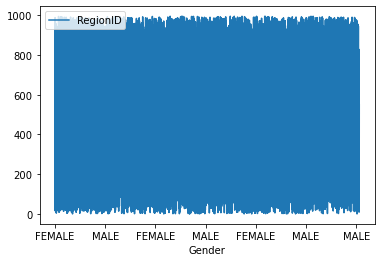

In [14]:
df.plot(x="Gender", y="RegionID")

In [1]:
df.plot.area(stacked=False)

NameError: name 'df' is not defined